In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"E:\Python_code\Symptom2Disease.csv"
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())


In [18]:
# Check the unique entries in the 'label' column
unique_labels = data['label'].unique()

# Print the unique labels

# Count of unique labels
print(len(unique_labels))


24


In [3]:
# Check the column names and data types
print(data.info())

# Check for any missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB
None
Unnamed: 0    0
label         0
text          0
dtype: int64


In [9]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Optionally, remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Load your dataset
data = pd.read_csv('Symptom2Disease.csv')

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Save the cleaned data to a new CSV file
cleaned_file_path = r'E:\Python_code\Clean_data.csv'
data.to_csv(cleaned_file_path, index=False)

# Show the cleaned text and confirm file save
print(data['cleaned_text'].head())
print(f'Cleaned data saved to {cleaned_file_path}')


0    experiencing skin rash arms legs torso past we...
1    skin peeling especially knees elbows scalp pee...
2    experiencing joint pain fingers wrists knees p...
3    silver like dusting skin especially lower back...
4    nails small dents pits often feel inflammatory...
Name: cleaned_text, dtype: object
Cleaned data saved to E:\Python_code\Clean_data.csv


[nltk_data] Downloading package stopwords to C:\Users\Anivesh
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9791666666666666
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.86      1.00      0.92        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       1.00      0.83      0.91        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                     

In [13]:
import joblib

# Assuming 'model' is your trained model and 'tfidf' is your vectorizer
model_file_path = r"E:\Python_code\symptom_model.pkl"
tfidf_file_path = r"E:\Python_code\tfidf_vectorizer.pkl"

# Save the model
joblib.dump(model, model_file_path)

# Save the TF-IDF vectorizer
joblib.dump(tfidf, tfidf_file_path)

print(f"Model saved at: {model_file_path}")
print(f"TF-IDF Vectorizer saved at: {tfidf_file_path}")


Model saved at: E:\Python_code\symptom_model.pkl
TF-IDF Vectorizer saved at: E:\Python_code\tfidf_vectorizer.pkl


Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
277/277 ━━━━━━━━━━━━━━━━━━━━ 157s 373ms/step - accuracy: 0.5245 - loss: 0.7189 - val_accuracy: 0.4653 - val_loss: 0.6546
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4308 - loss: 0.6681
Test Accuracy: 0.4423, Test Loss: 0.6712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Classification Report:
               precision    recall  f1-score   support

    fractured       0.61      0.28      0.38       193
not_fractured       0.38      0.71      0.49       119

     accuracy                           0.44       312
    macro avg       0.49      0.49      0.44   

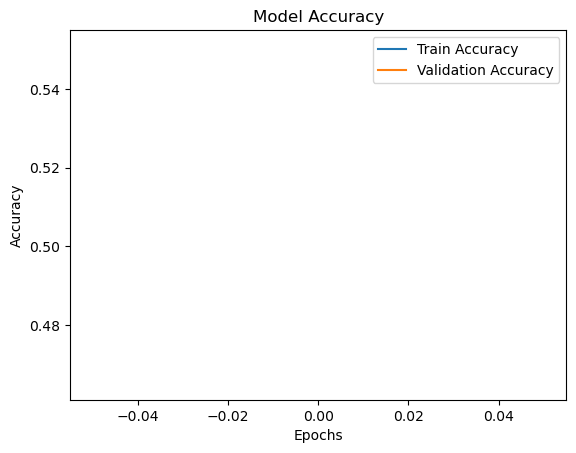

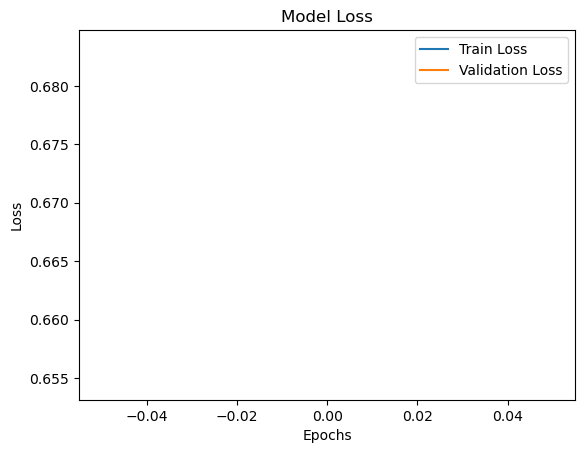

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset
# Define dataset paths
train_path = "Bone fracture Dataset/training"
test_path = "Bone fracture Dataset/testing"

# Load training and testing datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),  # Resize images
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32
)

# Extract class names
class_names = train_ds.class_names

# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Split test dataset into validation and test sets
val_ds = test_ds.take(len(test_ds) // 2)  # Use half for validation
test_ds = test_ds.skip(len(test_ds) // 2)  # Use the remaining for testing

# Add data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# Prefetch data for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 2. Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1  # Adjust as needed
)

# 5. Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# 6. Predict and Calculate Metrics
# Extract test data
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_pred = np.concatenate([model.predict(x) for x, _ in test_ds], axis=0)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred_binary, target_names=class_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_binary))

# 7. Plot Training and Validation Performance
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [10]:
pip install nest_asyncio


Note: you may need to restart the kernel to use updated packages.


In [16]:
import nest_asyncio
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import re
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nest_asyncio.apply()  # Necessary for event loop in Jupyter

app = Flask(__name__)

# Load your trained model and TF-IDF vectorizer
model = joblib.load("E:/inpy/symptom_model.pkl")
tfidf = joblib.load("E:/inpy/tfidf_vectorizer.pkl")

# Load medicine dataset
medicine_data = pd.read_csv("E:/inpy/drugs_side_effects_drugs_com.csv")

# LINE API details
LINE_ACCESS_TOKEN = 'UGkp6lKA5OnN7kvRudKe1K2TOxNo3eGFcWjPhAHQzzrEgPuJDi/rl+vzOS2yvjUYYzaaARGrHX+sBoYHNaBevdJ9+0DwcxVP7nTgDvJX2gCErqAs0LFaGVB+fd7zsxzTf8Yal3ROBpcPggySyrGh5gdB04t89/1O/w1cDnyilFU='
LINE_API_URL = 'https://api.line.me/v2/bot/message/reply'

# Store temporary user data
user_data = {}

@app.route('/webhook', methods=['POST'])
def webhook():
    body = request.get_json()

    # Extract message and reply token from LINE webhook
    events = body.get('events', [])
    for event in events:
        if event['type'] == 'message':
            reply_token = event['replyToken']
            user_id = event['source']['userId']
            user_message = event['message']['text']

            if user_id not in user_data:
                user_data[user_id] = {"step": "diagnosis"}

            step = user_data[user_id]["step"]

            if step == "diagnosis":
                # Use your symptom model to predict the disease
                symptoms_cleaned = preprocess_text(user_message)
                symptoms_vectorized = tfidf.transform([symptoms_cleaned])
                prediction_probs = model.predict_proba(symptoms_vectorized)[0]
                top_indices = prediction_probs.argsort()[-3:][::-1]  # Get top 3 diseases

                reply_message = "The top 3 predicted diseases are:\n"
                for i in top_indices:
                    disease = model.classes_[i]
                    prob = prediction_probs[i] * 100
                    reply_message += f"{disease}: {prob:.2f}%\n"

                reply_message += "\nWould you like a medicine recommendation? Reply 'Yes' or 'No'."
                user_data[user_id]["diagnosis"] = [model.classes_[i] for i in top_indices]
                user_data[user_id]["step"] = "ask_medicine"

            elif step == "ask_medicine":
                if user_message.lower() == "yes":
                    reply_message = "Please provide your details in the following format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"
                    user_data[user_id]["step"] = "get_user_details"
                else:
                    reply_message = "Alright! Let me know if you need anything else."
                    user_data[user_id]["step"] = "diagnosis"

            elif step == "get_user_details":
                # Parse user input for details
                details = parse_user_details(user_message)
                if details:
                    user_data[user_id].update(details)

                    # Get the top diagnosis
                    top_diagnosis = user_data[user_id]["diagnosis"][0]

                    # Filter medicines
                    recommendations = recommend_medicine(top_diagnosis, details)
                    if recommendations:
                        reply_message = "Here are some recommended medicines:\n"
                        for rec in recommendations:
                            reply_message += f"- {rec}\n"
                    else:
                        reply_message = "Sorry, no specific medicines found for your condition."

                    reply_message += "\nLet me know if you need further assistance."
                    user_data[user_id]["step"] = "diagnosis"
                else:
                    reply_message = "Invalid format. Please provide details in the format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"

            # Send the reply back to LINE
            send_reply(reply_token, reply_message)

    return 'OK'

def recommend_medicine(condition, user_details):
    filtered = medicine_data[medicine_data['medical_condition'].str.contains(condition, case=False, na=False)]

    # Apply filters based on user details
    if user_details['Gender'] == 'F':
        if user_details['Pregnant'] == 'Y':
            filtered = filtered[filtered['pregnancy_category'] == 'Safe']

    # Sort medicines by number of reviews in descending order
    filtered = filtered.sort_values(by='no_of_reviews', ascending=False)
    return filtered['drug_name'].head(5).tolist()

def parse_user_details(message):
    try:
        details = {}
        lines = message.split("\n")
        for line in lines:
            key, value = line.split(":")
            key = key.strip().lower()
            value = value.strip()

            if key == "age":
                details["Age"] = int(value)
            elif key == "gender":
                details["Gender"] = value.upper()
            elif key == "pregnant":
                details["Pregnant"] = value.upper()

        if details.get("Gender") == 'M':
            details["Pregnant"] = 'N'  # Not applicable for males

        return details
    except Exception as e:
        return None

def send_reply(reply_token, message):
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {LINE_ACCESS_TOKEN}',
    }

    body = {
        'replyToken': reply_token,
        'messages': [{
            'type': 'text',
            'text': message
        }]
    }

    requests.post(LINE_API_URL, headers=headers, data=json.dumps(body))

def preprocess_text(text):
    # Your text preprocessing function
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

if __name__ == '__main__':
    app.run(port=5001, use_reloader=False)


c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarni

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /webhook HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 16:23:54] "POST /

In [1]:
import nest_asyncio
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import re
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from keras.models import load_model
from PIL import Image
import io
import base64
from threading import Thread

nest_asyncio.apply()

app = Flask(__name__)

# Load your trained models and TF-IDF vectorizer
model = joblib.load("E:/inpy/symptom_model.pkl")
tfidf = joblib.load("E:/inpy/tfidf_vectorizer.pkl")

# Load medicine dataset
medicine_data = pd.read_csv("E:/inpy/drugs_side_effects_drugs_com.csv")

# Load image models
xray_model = load_model("E:/inpy/resnet_multiclass_model.h5")
skin_model = load_model("E:/inpy/P_densenet121_medical_model_2.h5")
classification_model = load_model("E:/inpy/resnet50_xray_skin_model.h5")

# LINE API details
LINE_ACCESS_TOKEN = 'UGkp6lKA5OnN7kvRudKe1K2TOxNo3eGFcWjPhAHQzzrEgPuJDi/rl+vzOS2yvjUYYzaaARGrHX+sBoYHNaBevdJ9+0DwcxVP7nTgDvJX2gCErqAs0LFaGVB+fd7zsxzTf8Yal3ROBpcPggySyrGh5gdB04t89/1O/w1cDnyilFU='
LINE_API_URL = 'https://api.line.me/v2/bot/message/reply'

# Store temporary user data
user_data = {}

@app.route('/webhook', methods=['POST'])
def webhook():
    body = request.get_json()

    # Process the events in a separate thread to respond quickly
    thread = Thread(target=process_events, args=(body,))
    thread.start()

    # Return 200 response immediately
    return 'OK'

def process_events(body):
    events = body.get('events', [])
    for event in events:
        if event['type'] == 'message':
            reply_token = event['replyToken']
            user_id = event['source']['userId']

            if event['message']['type'] == 'text':
                user_message = event['message']['text']
                handle_text_message(user_id, user_message, reply_token)

            elif event['message']['type'] == 'image':
                handle_image_message(user_id, event, reply_token)

def handle_text_message(user_id, user_message, reply_token):
    try:
        if user_id not in user_data:
            user_data[user_id] = {"step": "diagnosis"}

        step = user_data[user_id]["step"]

        if step == "diagnosis":
            symptoms_cleaned = preprocess_text(user_message)
            symptoms_vectorized = tfidf.transform([symptoms_cleaned])
            prediction_probs = model.predict_proba(symptoms_vectorized)[0]
            top_indices = prediction_probs.argsort()[-3:][::-1]

            reply_message = "The top 3 predicted diseases are:\n"
            for i in top_indices:
                disease = model.classes_[i]
                prob = prediction_probs[i] * 100
                reply_message += f"{disease}: {prob:.2f}%\n"

            reply_message += "\nWould you like a medicine recommendation? Reply 'Yes' or 'No'."
            user_data[user_id]["diagnosis"] = [model.classes_[i] for i in top_indices]
            user_data[user_id]["step"] = "ask_medicine"

        elif step == "ask_medicine":
            if user_message.lower() == "yes":
                reply_message = "Please provide your details in the following format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"
                user_data[user_id]["step"] = "get_user_details"
            else:
                reply_message = "Alright! Let me know if you need anything else."
                user_data[user_id]["step"] = "diagnosis"

        elif step == "get_user_details":
            details = parse_user_details(user_message)
            if details:
                user_data[user_id].update(details)
                top_diagnosis = user_data[user_id]["diagnosis"][0]
                recommendations = recommend_medicine(top_diagnosis, details)
                if recommendations:
                    reply_message = "Here are some recommended medicines:\n"
                    for rec in recommendations:
                        reply_message += f"- {rec}\n"
                else:
                    reply_message = "Sorry, no specific medicines found for your condition."

                reply_message += "\nLet me know if you need further assistance."
                user_data[user_id]["step"] = "diagnosis"
            else:
                reply_message = "Invalid format. Please provide details in the format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"

        send_reply(reply_token, reply_message)
    except Exception as e:
        print(f"Error handling text message: {e}")
        send_reply(reply_token, "An error occurred. Please try again.")

def handle_image_message(user_id, event, reply_token):
    try:
        message_id = event['message']['id']
        image_url = f"https://api-data.line.me/v2/bot/message/{message_id}/content"
        headers = {'Authorization': f'Bearer {LINE_ACCESS_TOKEN}'}
        response = requests.get(image_url, headers=headers, stream=True)

        if response.status_code == 200:
            image = Image.open(io.BytesIO(response.content))
            image = image.resize((224, 224))
            image_array = np.expand_dims(np.array(image) / 255.0, axis=0)

            # Determine if the image is X-ray or skin
            classification_result = classification_model.predict(image_array)
            is_xray = classification_result[0][0] > 0.5

            if is_xray:
                predictions = xray_model.predict(image_array)
                predicted_class = np.argmax(predictions)
                reply_message = f"X-ray Analysis: Predicted class - {predicted_class}"
            else:
                predictions = skin_model.predict(image_array)
                predicted_class_index = np.argmax(predictions)

                # Class mapping for skin conditions
                class_mapping = {
                    0: 'Acne', 1: 'Cancer', 2: 'Dermatofibroma', 3: 'Diabetic Foot Ulcers',
                    4: 'Eczema', 5: 'Melanocytic nevus', 6: 'Melanoma', 7: 'Milia',
                    8: 'Ordinary wound', 9: 'Pigment', 10: 'Rosacea', 11: 'Vascular lesion',
                    12: 'carcinoma', 13: 'infection', 14: 'keratosis', 15: 'non-cancer'
                }

                # Get the corresponding class name
                predicted_class_name = class_mapping.get(predicted_class_index, "Unknown")
                reply_message = f"Skin Analysis: Predicted class - {predicted_class_name}"
        else:
            reply_message = "Sorry, I couldn't process the image. Please try again."

        send_reply(reply_token, reply_message)
    except Exception as e:
        print(f"Error handling image message: {e}")
        send_reply(reply_token, "An error occurred while processing the image. Please try again.")


def recommend_medicine(condition, user_details):
    filtered = medicine_data[medicine_data['medical_condition'].str.contains(condition, case=False, na=False)]

    if user_details['Gender'] == 'F' and user_details.get('Pregnant') == 'Y':
        filtered = filtered[filtered['pregnancy_category'] == 'Safe']

    filtered = filtered.sort_values(by='no_of_reviews', ascending=False)
    return filtered['drug_name'].head(5).tolist()

def parse_user_details(message):
    try:
        details = {}
        lines = message.split("\n")
        for line in lines:
            key, value = line.split(":")
            key = key.strip().lower()
            value = value.strip()

            if key == "age":
                details["Age"] = int(value)
            elif key == "gender":
                details["Gender"] = value.upper()
            elif key == "pregnant":
                details["Pregnant"] = value.upper()

        if details.get("Gender") == 'M':
            details["Pregnant"] = 'N'

        return details
    except Exception:
        return None

def send_reply(reply_token, message):
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {LINE_ACCESS_TOKEN}',
    }

    body = {
        'replyToken': reply_token,
        'messages': [{
            'type': 'text',
            'text': message
        }]
    }

    requests.post(LINE_API_URL, headers=headers, data=json.dumps(body))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

if __name__ == '__main__':
    app.run(port=5000, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [11]:
import nest_asyncio
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import re
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nest_asyncio.apply()  # Necessary for event loop in Jupyter

app = Flask(__name__)

# Load your trained model and TF-IDF vectorizer
model = joblib.load("E:/inpy/symptom_model.pkl")
tfidf = joblib.load("E:/inpy/tfidf_vectorizer.pkl")

# Load medicine dataset
medicine_data = pd.read_csv("E:/inpy/drugs_side_effects_drugs_com.csv")

# LINE API details
LINE_ACCESS_TOKEN = 'UGkp6lKA5OnN7kvRudKe1K2TOxNo3eGFcWjPhAHQzzrEgPuJDi/rl+vzOS2yvjUYYzaaARGrHX+sBoYHNaBevdJ9+0DwcxVP7nTgDvJX2gCErqAs0LFaGVB+fd7zsxzTf8Yal3ROBpcPggySyrGh5gdB04t89/1O/w1cDnyilFU='
LINE_API_URL = 'https://api.line.me/v2/bot/message/reply'

# Store temporary user data
user_data = {}

@app.route('/webhook', methods=['POST'])
def webhook():
    body = request.get_json()

    # Extract message and reply token from LINE webhook
    events = body.get('events', [])
    for event in events:
        if event['type'] == 'message':
            reply_token = event['replyToken']
            user_id = event['source']['userId']
            user_message = event['message']['text']

            if user_id not in user_data:
                user_data[user_id] = {"step": "diagnosis"}

            step = user_data[user_id]["step"]

            if step == "diagnosis":
                # Use your symptom model to predict the disease
                symptoms_cleaned = preprocess_text(user_message)
                symptoms_vectorized = tfidf.transform([symptoms_cleaned])
                prediction_probs = model.predict_proba(symptoms_vectorized)[0]
                top_indices = prediction_probs.argsort()[-3:][::-1]  # Get top 3 diseases

                reply_message = "The top 3 predicted diseases are:\n"
                for i in top_indices:
                    disease = model.classes_[i]
                    prob = prediction_probs[i] * 100
                    reply_message += f"{disease}: {prob:.2f}%\n"

                reply_message += "\nWould you like a medicine recommendation? Reply 'Yes' or 'No'."
                user_data[user_id]["diagnosis"] = [model.classes_[i] for i in top_indices]
                user_data[user_id]["step"] = "ask_medicine"

            elif step == "ask_medicine":
                if user_message.lower() == "yes":
                    reply_message = "Please provide your details in the following format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"
                    user_data[user_id]["step"] = "get_user_details"
                elif user_message.lower() == "no":
                    reply_message = "Alright! Let me know if you need anything else."
                    user_data[user_id]["step"] = "diagnosis"
                else:
                    reply_message = "Invalid response. Please reply with 'Yes' or 'No'."

            elif step == "get_user_details":
                # Parse user input for details
                details = parse_user_details(user_message)
                if details:
                    user_data[user_id].update(details)

                    # Get the top diagnosis
                    top_diagnosis = user_data[user_id]["diagnosis"][0]

                    # Filter medicines
                    recommendations = recommend_medicine(top_diagnosis, details)
                    if recommendations:
                        reply_message = "Here are some recommended medicines:\n"
                        for rec in recommendations:
                            reply_message += f"- {rec}\n"
                    else:
                        reply_message = "Sorry, no specific medicines found for your condition."

                    reply_message += "\nLet me know if you need further assistance."
                    user_data[user_id]["step"] = "diagnosis"
                else:
                    reply_message = "Invalid format. Please provide details in the format:\nAge: <number>\nGender: M/F\nPregnant: Y/N (optional if Gender: M)"

            # Send the reply back to LINE
            send_reply(reply_token, reply_message)

    return 'OK'

def recommend_medicine(condition, user_details):
    filtered = medicine_data[medicine_data['medical_condition'].str.contains(condition, case=False, na=False)]

    # Apply filters based on user details
    if user_details['Gender'] == 'F':
        if user_details['Pregnant'] == 'Y':
            filtered = filtered[filtered['pregnancy_category'] == 'Safe']

    # Sort medicines by number of reviews in descending order
    filtered = filtered.sort_values(by='no_of_reviews', ascending=False)
    return filtered['drug_name'].head(5).tolist()

def parse_user_details(message):
    try:
        details = {}
        lines = message.split("\n")
        for line in lines:
            key, value = line.split(":")
            key = key.strip().lower()
            value = value.strip()

            if key == "age":
                details["Age"] = int(value)
            elif key == "gender":
                details["Gender"] = value.upper()
            elif key == "pregnant":
                details["Pregnant"] = value.upper()

        if details.get("Gender") == 'M':
            details["Pregnant"] = 'N'  # Not applicable for males

        return details
    except Exception as e:
        return None

def send_reply(reply_token, message):
    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {LINE_ACCESS_TOKEN}',
    }

    body = {
        'replyToken': reply_token,
        'messages': [{
            'type': 'text',
            'text': message
        }]
    }

    requests.post(LINE_API_URL, headers=headers, data=json.dumps(body))

def preprocess_text(text):
    # Your text preprocessing function
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

if __name__ == '__main__':
    app.run(port=5001, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Anivesh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarni

INFO:werkzeug:127.0.0.1 - - [03/Jan/2025 14:34:08] "POST /webhook HTTP/1.1" 200 -
